## Jack's Car Rental

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

## Initialization

In [2]:
# Technically, there will be infinite s', but we limited it to 20.

SIZE = 20
states = np.zeros((SIZE+1,SIZE+1)) # Given a pair of state, what is its state value?
policy = np.zeros((SIZE+1,SIZE+1)) # Given a pair of state, what is the action to take? (Always deterministic)
theta = 0.1
gamma = 0.9

## Evaluation

In [3]:
# No need for 0 - 20, because the pmf is really low.
REQ1_MAX = 11 
REQ2_MAX = 16
RET1_MAX = 11
RET2_MAX = 9

def gather_value(state, action):
    s1, s2 = state
    v_s = 0

    # Optimization: since (s,a) does not change, we could calculate 
    # 1. part of the "new state" (the action part, not including the return)
    # 2. part of reward (the -2 part)

    # Use fixed bounds covering Poisson distributions
    for req1 in range(REQ1_MAX):
        for req2 in range(REQ2_MAX):
            for ret1 in range(RET1_MAX):
                for ret2 in range(RET2_MAX):

                    p = calculate_prob(req1, req2, ret1, ret2)
                    reward, s1_prime, s2_prime = calculate_reward(
                        req1, req2, ret1, ret2, s1, s2, action
                    )
                    
                    v_s += p * (reward + gamma * states[int(s1_prime), int(s2_prime)])
    return v_s

# The probability of the request and return values
def calculate_prob(req1, req2, ret1, ret2):
    p1 = math.exp(-3) * 3**req1 / math.factorial(req1)
    p2 = math.exp(-4) * 4**req2 / math.factorial(req2)
    p3 = math.exp(-3) * 3**ret1 / math.factorial(ret1)
    p4 = math.exp(-2) * 2**ret2 / math.factorial(ret2)
    return p1 * p2 * p3 * p4

def calculate_reward(req1, req2, ret1, ret2, s1, s2, action):
    # avail are >= 0 because policy is assigned at Improvement, 
    # and feasible() filters out invalid ones.
    
    avail1, avail2 = min(20, max(0, s1-action)), min(20, max(0, s2+action))
    rent1, rent2 = min(req1, avail1), min(req2, avail2)
    ret = -2 * abs(action)
    rental = (rent1 + rent2) * 10
    return ret + rental, max(min(avail1 - rent1 + ret1, 20),0), max(min(avail2 - rent2 + ret2, 20),0)

In [4]:
def policy_evaluation():
    break_loop = False
    count = 0
    while not break_loop:
        change = 0
        for i in range(SIZE+1):
            for j in range(SIZE+1):
                prev_state = states[i,j]
                states[i,j] = gather_value([i,j], policy[i,j]) 
                change = max(change, abs(prev_state - states[i,j]))
        # print("finished iteration ", count)
        count += 1
        if change < theta:
            break_loop = True

## Improvement

In [5]:
def determine_action(state):
    max_value, max_action = -math.inf, 0
    for action in range(-5, 6):
        if not feasible(state, action):
            continue
        value = gather_value(state, action)
        if value > max_value:
            max_action = action
            max_value = value
    return max_action

def feasible(state, action):
    s1, s2 = state
    a = abs(action)
    return (
        (action > 0 and s1 >= a and s2 + a <= 20) or
        (action <= 0 and s2 >= a and s1 + a <= 20)
    )


In [6]:
def policy_improvement():
    policy_stable = True
    for i in range(SIZE+1):
        for j in range(SIZE+1):
            old_action = policy[i,j]
            policy[i,j] = determine_action([i,j])
            if policy[i,j] != old_action:
                policy_stable = False

    if policy_stable:
        print("Iteration complete! ", states, policy)
        return True
    return False

In [7]:
def show_graph(graph):
    # Create custom colormap matching the screenshot
    colors = [
        '#1a2c7b', '#2a4ca7', '#3a7bb7', '#5aa8c8', '#8ad2d1',
        '#c8e6be', '#f6f9c4', '#f9d77c', '#f9a76a', '#f86a5a', '#e93a4a'
    ]
    cmap = ListedColormap(colors)

    # Create plot
    plt.figure(figsize=(6, 6))
    plt.imshow(graph, cmap=cmap, vmin=-5, vmax=5, origin='lower', extent=[0, 20, 0, 20])
    plt.colorbar(ticks=range(-5, 6), label='Cars moved')
    plt.xlabel('Cars at location 2')
    plt.ylabel('Cars at location 1')
    plt.title('Optimal Policy')
    plt.show()

Start iteration:  1
determine [0, 0] 0 0 values:  402.75422600520545 -inf
determine [0, 1] -1 0 values:  410.56750996165897 -inf
determine [0, 1] 0 -1 values:  412.7199352110537 410.56750996165897
determine [0, 2] -2 0 values:  417.79515463108834 -inf
determine [0, 2] -1 -2 values:  420.53321916186644 417.79515463108834
determine [0, 2] 0 -1 values:  422.57647839088565 420.53321916186644
determine [0, 3] -3 0 values:  424.0328436279043 -inf
determine [0, 3] -2 -3 values:  427.7608636776412 424.0328436279043
determine [0, 3] -1 -2 values:  430.3897622958197 427.7608636776412
determine [0, 3] 0 -1 values:  432.1983810517098 430.3897622958197
determine [0, 4] -4 0 values:  429.0869628939031 -inf
determine [0, 4] -3 -4 values:  433.9985520894205 429.0869628939031
determine [0, 4] -2 -3 values:  437.6174060050777 433.9985520894205
determine [0, 4] -1 -2 values:  440.01166477557956 437.6174060050777
determine [0, 4] 0 -1 values:  441.4708047131788 440.01166477557956
determine [0, 5] -5 0 val

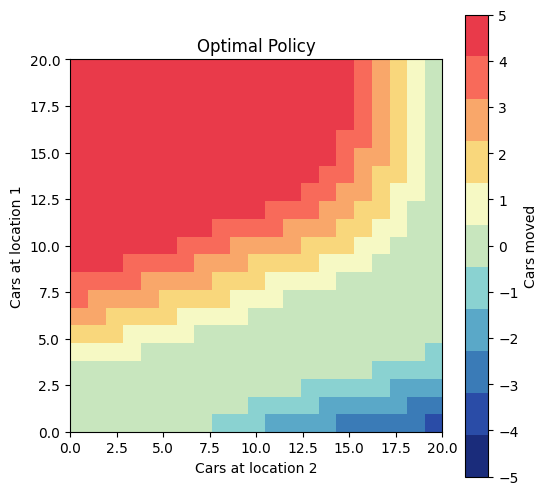

Start iteration:  2
determine [0, 0] 0 0 values:  413.93472468148485 -inf
determine [0, 1] -1 0 values:  421.79268263605735 -inf
determine [0, 1] 0 -1 values:  423.8973686756399 421.79268263605735
determine [0, 2] -2 0 values:  429.2207361675045 -inf
determine [0, 2] -1 -2 values:  431.75522177494037 429.2207361675045
determine [0, 2] 0 -1 values:  433.73823945720574 431.75522177494037
determine [0, 3] -3 0 values:  435.9495713741934 -inf
determine [0, 3] -2 -3 values:  439.1827977842811 435.9495713741934
determine [0, 3] -1 -2 values:  441.59557115378 439.1827977842811
determine [0, 3] 0 -1 values:  443.3181832106489 441.59557115378
determine [0, 4] -4 0 values:  441.8912533497732 -inf
determine [0, 4] -3 -4 values:  445.9104500798405 441.8912533497732
determine [0, 4] -2 -3 values:  449.0207679038101 445.9104500798405
determine [0, 4] -1 -2 values:  451.1741749861145 449.0207679038101
determine [0, 4] 0 -1 values:  452.5112415768955 451.1741749861145
determine [0, 5] -5 0 values:  44

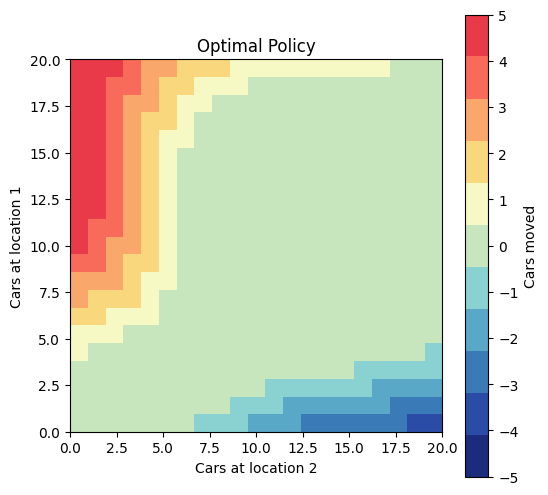

Start iteration:  3


KeyboardInterrupt: 

In [8]:
iter_count = 1
while True:
    print("Start iteration: ", iter_count)
    policy_evaluation()
    if policy_improvement():
        break
    print("Finished iteration with policy: ", policy)
    show_graph(policy)
    iter_count += 1